<a href="https://colab.research.google.com/github/p0mona/university_data_analysis_methods/blob/main/mad_lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ks_2samp, ttest_ind, f_oneway, chi2_contingency

In [2]:
heart_disease = pd.read_csv("https://archive.ics.uci.edu/static/public/45/data.csv")
heart_disease = pd.DataFrame(heart_disease)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [22]:
adult = pd.read_csv("https://archive.ics.uci.edu/static/public/2/data.csv")
adult = pd.DataFrame(adult)
adult.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


#Zadanie 1

Wykorzystaj zbiór danych Heart Disease, a następnie:

1.1 Sprawdź w opisie zbioru danych (data card), które cechy są cechami numerycznymi, a które kategorialnymi. Sprawdź w jaki sposób biblioteka pandas domyślnie wczytuje te dane. Jeżeli w ramce cecha kategorialna jest oznaczona jako numeryczna to zamień ją na kategorialną (pandas posiada typ danych category).

1.2 Sprawdź czy w zbiorze występują wartości brakujące. Jeżeli tak, to przed wykonaniem kolejnych zadań przygotuj podzbiór danych, który nie będzie zawierał obserwacji z wartościami brakującymi.

In [4]:
#1.1
print(f"Typy danych: \n{heart_disease.dtypes}")

categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
for col in categorical_cols:
    heart_disease[col] = heart_disease[col].astype('category')
print(f"\nPo zmianie: \n{heart_disease.dtypes}")

Typy danych: 
age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num            int64
dtype: object

Po zmianie: 
age            int64
sex         category
cp          category
trestbps       int64
chol           int64
fbs         category
restecg     category
thalach        int64
exang       category
oldpeak      float64
slope       category
ca          category
thal        category
num            int64
dtype: object


In [5]:
#1.2
heart_disease[heart_disease.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
87,53,0,3,128,216,0,2,115,0,0.0,1,0.0,NaN,0
166,52,1,3,138,223,0,0,169,0,0.0,1,NaN,3.0,0
192,43,1,4,132,247,1,2,143,1,0.1,2,NaN,7.0,1
266,52,1,4,128,204,1,0,156,1,1.0,2,0.0,NaN,2
287,58,1,2,125,220,0,0,144,0,0.4,2,NaN,7.0,0
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [6]:
hd_without_gaps = heart_disease.dropna()

In [7]:
hd_without_gaps[hd_without_gaps.isnull().any(axis=1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num


#Zadanie 2

Dla zbioru danych z zadania 1 oblicz i wyświetl:

2.1 Rozkład wartości w kolumnie num (Target) - czy dane są zbalansowane? Wyświetl je na wykresie kołowym.

2.2 Podstawową statystykę opisową dla każdej cechy numerycznej (min, max, średnia, mediana, odchylenie standardowe, wartość kwantyli 25, 50 oraz 75).

2.3 Dominantę (modę) dla każdej cechy kategorialnej.

2.4 Wyświetl macierz korelacji Pearsona dla każdej cechy numerycznej zbioru. Wyświetl ją również na wykresie typu mapa cieplna z wykorzystaniem biblioteki seaborn.

2.5 Z macierzy korelacji wyświetl nazwy trzech najbardziej skorelowanych cech względem cechy age (bezwzględna wartość z korelacji, bez uwzględniania samej cechy age w wynikach, która jak wiemy będzie skorelowana sama do siebie w stopniu równym 1).

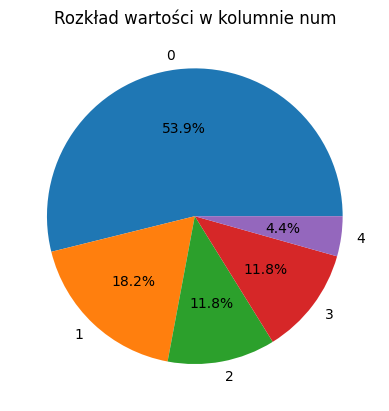

In [8]:
#2.1
num_counts = hd_without_gaps['num'].value_counts()
plt.pie(num_counts, labels=num_counts.index, autopct='%1.1f%%')
plt.title('Rozkład wartości w kolumnie num'); # -> dane nie są zbalansowane

In [9]:
#2.2
print(hd_without_gaps.describe())

median = hd_without_gaps.median(numeric_only=True)
print(f"\nMediana: \n{median}")

              age    trestbps        chol     thalach     oldpeak         num
count  297.000000  297.000000  297.000000  297.000000  297.000000  297.000000
mean    54.542088  131.693603  247.350168  149.599327    1.055556    0.946128
std      9.049736   17.762806   51.997583   22.941562    1.166123    1.234551
min     29.000000   94.000000  126.000000   71.000000    0.000000    0.000000
25%     48.000000  120.000000  211.000000  133.000000    0.000000    0.000000
50%     56.000000  130.000000  243.000000  153.000000    0.800000    0.000000
75%     61.000000  140.000000  276.000000  166.000000    1.600000    2.000000
max     77.000000  200.000000  564.000000  202.000000    6.200000    4.000000

Mediana: 
age          56.0
trestbps    130.0
chol        243.0
thalach     153.0
oldpeak       0.8
num           0.0
dtype: float64


In [10]:
#2.3
hd_without_gaps[categorical_cols].mode()

,sex,cp,fbs,restecg,exang,slope,ca,thal
0,1,4,0,0,0,1,0.0,3.0


In [11]:
#2.4
numeric_df = hd_without_gaps.select_dtypes(include=['number'])
numeric_df.head()

,age,trestbps,chol,thalach,oldpeak,num
0,63,145,233,150,2.3,0
1,67,160,286,108,1.5,2
2,67,120,229,129,2.6,1
3,37,130,250,187,3.5,0
4,41,130,204,172,1.4,0


In [12]:
matrix_corr = numeric_df.corr(method='pearson')
print(matrix_corr)

               age  trestbps      chol   thalach   oldpeak       num
age       1.000000  0.290476  0.202644 -0.394563  0.197123  0.222156
trestbps  0.290476  1.000000  0.131536 -0.049108  0.191243  0.159620
chol      0.202644  0.131536  1.000000 -0.000075  0.038596  0.066448
thalach  -0.394563 -0.049108 -0.000075  1.000000 -0.347640 -0.420639
oldpeak   0.197123  0.191243  0.038596 -0.347640  1.000000  0.501461
num       0.222156  0.159620  0.066448 -0.420639  0.501461  1.000000


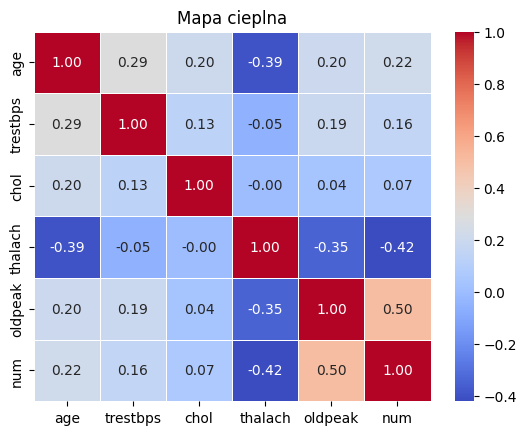

In [13]:
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Mapa cieplna');

In [15]:
#2.5
age_corr = matrix_corr['age'].drop('age').abs()
age_corr

,age
trestbps,0.290476
chol,0.202644
thalach,0.394563
oldpeak,0.197123
num,0.222156


In [18]:
top = age_corr.sort_values(ascending=False).head(3)
top

,age
thalach,0.394563
trestbps,0.290476
num,0.222156


#Zadanie 3

Do wykonania poniższych poleceń wykorzystaj zbiór Adult. W tym zbiorze również ustaw typy kategorialne dla odpowiednich kolumn zgodnie z opisem zbioru danych.

3.1 Na podstawie zbioru bazowego przygotuj dwa podzbiory danych:

zbior_1 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie bez uwzględnienia rozkładu dla cechy opisowej - target)

zbior_2 - pozostałe 80% wartości bez elementów ze zbioru_1

zbior_3 - losowe 20% wartości ze zbioru oryginalnego (próbkowanie z uwzględnieniem rozkładu cechy opisowej)

Następnie porównaj średnią wartość cechy capital-loss dla każdej z prób. Jakie jest prawdopodobieństwo, że te próby pochodzą z tej samej populacji?

3.2 Wykonaj test t dla prób zależnych dla wartości cechy capital-gain przyjmując następującą hipotezę zerową: średnia wartość tej cechy dla race='White' jest istotnie wyższa niż dla pozostałych wartości cechy race. Przyjmij lub odrzuć przyjętą hipotezę.

3.3 Wykorzystując test ANOVA sprawdź jak istotna statystycznie jest różnica średniej wartości cechy capital-gain dla każdej z wartości race z osobna. Wskaż p-values dla tego testu. Jak zinterpretować ten wynik?

In [24]:
print(f"Typy danych: \n{adult.dtypes}")

categorical_cols = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'native-country']
for col in categorical_cols:
    adult[col] = adult[col].astype('category')
print(f"\nPo zmianie: \n{adult.dtypes}")

Typy danych: 
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

Po zmianie: 
age                  int64
workclass         category
fnlwgt               int64
education         category
education-num        int64
marital-status    category
occupation        category
relationship      category
race              category
sex                 object
capital-gain         int64
capital-loss         int64
hours-per-week       int64
native-country    category
income              object
dtype: object


In [34]:
#3.1
zbior_1 = adult.sample(frac=0.2, random_state=42)
zbior_2 = adult.drop(zbior_1.index)

groups = adult.groupby('income')
zbior_3 = pd.DataFrame()
for name, group in groups:
  zbior_3 = pd.concat([zbior_3, group.sample(frac=0.2, random_state=42)])

In [39]:
mean_zbior_1 = zbior_1['capital-loss'].mean()
mean_zbior_2 = zbior_2['capital-loss'].mean()
mean_zbior_3 = zbior_3['capital-loss'].mean()

print(f'Średnia wartość capital-loss w zbiorze 1: {mean_zbior_1}')
print(f'Średnia wartość capital-loss w zbiorze 2: {mean_zbior_2}')
print(f'Średnia wartość capital-loss w zbiorze 3: {mean_zbior_3}')

Średnia wartość capital-loss w zbiorze 1: 88.41410728910729
Średnia wartość capital-loss w zbiorze 2: 87.27437682346317
Średnia wartość capital-loss w zbiorze 3: 88.00522113022113


In [45]:
ks_1_2 = ks_2samp(zbior_1['capital-loss'].dropna(), zbior_2['capital-loss'].dropna())
ks_1_3 = ks_2samp(zbior_1['capital-loss'].dropna(), zbior_3['capital-loss'].dropna())
ks_2_3 = ks_2samp(zbior_2['capital-loss'].dropna(), zbior_3['capital-loss'].dropna())

print(f"Wynik testu KS między zbior_1 i zbior_2: p-value = {ks_1_2.pvalue}")
print(f"Wynik testu KS między zbior_1 i zbior_3: p-value = {ks_1_3.pvalue}")
print(f"Wynik testu KS między zbior_2 i zbior_3: p-value = {ks_2_3.pvalue}")

if ks_1_2.pvalue > 0.05 and ks_1_3.pvalue > 0.05 and ks_2_3.pvalue > 0.05:
  print("Wszystkie próbki prawdopodobnie pochodzą z tej samej populacji.")
else:
  print("Istnieją różnice między próbkami, mogą pochodzić z różnych populacji.")

Wynik testu KS między zbior_1 i zbior_2: p-value = 1.0
Wynik testu KS między zbior_1 i zbior_3: p-value = 0.9999999999999997
Wynik testu KS między zbior_2 i zbior_3: p-value = 1.0
Wszystkie próbki prawdopodobnie pochodzą z tej samej populacji.


In [49]:
#3.2
white = adult[adult['race'] == 'White']['capital-gain'].dropna()
non_white = adult[adult['race'] != 'White']['capital-gain'].dropna()

print(f"Statystyka t: {t_stat}")
print(f"Wartość p: {p_value}")

if p_value < 0.05:
    print("Hipoteza odrzucona")
else:
    print("Hipoteza przyjęta")

Statystyka t: 0.24999888941233134
Wartość p: 0.802589258965766
Hipoteza przyjęta


In [53]:
#3.3
groups = [group['capital-gain'].dropna() for _, group in adult.groupby('race')]
f_stat, p_value = f_oneway(*groups)

print(f"Statystyka F: {f_stat}")
print(f"Wartość p: {p_value}")

if p_value < 0.05:
  print("Hipoteza odrzucona")
else:
  print("Hipoteza przyjęta") # -> istnieją statystycznie istotne różnice w średniej wartości capital-gain między co najmniej jedną parą grup race

Statystyka F: 7.543538179877224
Wartość p: 4.529130908980212e-06
Hipoteza odrzucona


<ipython-input-53-86eacef6be6f>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = [group['capital-gain'].dropna() for _, group in adult.groupby('race')]


#Zadanie 4

Wykonaj test Chi square dla wartości cechy capital-income dla dwóch grup:

ludzie w wieku < 40 lat

ludzie w wieku >= 40 lat

Wyświetl wyniki tego testu.

In [55]:
data_crosstable = pd.crosstab(adult['age'] < 40, adult['income'])
stat, p, dof, expected = chi2_contingency(data_crosstable)

print("p-values:",p)
if p < 0.05:
  print("Hypothesis Rejected")
else:
  print("Hypothesis Accepted")

p-values: 0.0
Hypothesis Rejected
